# Python to MySQL connection

In [1]:
# pip install mysql-connector-python

In [2]:
import pandas as pd

In [3]:
import mysql.connector
host = 'localhost'
user = 'root'
password = 'Nitwarangal@1830'
database = 'immigration'
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)
cursor = connection.cursor()

# Data loading

In [4]:
table_name = ['employee','belongs_to','Budget','contact','department',
              'Green_Card','I9_Form','On_Boarding','Passport','Previous_works_experience',
              'Project','Salary','Visa','Visa_Sponshership','works_in']

In [5]:
dataframes = {}
for i in table_name:
    query = f'SELECT * FROM {i}'
    cursor.execute(query)
    rows = cursor.fetchall()
    column_names = [desc[0] for desc in cursor.description]
    dataframes[f'df_{i}'] = pd.DataFrame(rows, columns=column_names)
cursor.close()
connection.close()

In [6]:
dataframes['df_Previous_works_experience'].head(2)

,ID_Emp,Num_years_Exp,Prev_Job_Title,Last_Working_Date,Prev_Company_Loc,Prev_Company_Name
0,00-0264691,6,Office Assistant II,2015-03-11,INDIA,Denesik and Sons
1,00-1373955,8,Registered Nurse,2016-03-21,JAPAN,"Lockman, Stark and Greenholt"


In [17]:
dataframes['df_works_in'].head(2)

,Project_ID,ID_Emp,Hours,email
0,1,12-3850982,656,tgoodbournl6@europa.eu
1,1,18-0400226,1997,dnapiera5@t-online.de


In [8]:
dataframes['df_belongs_to'].head(2)

,Dept_ID,Project_ID
0,101,6
1,101,12


In [9]:
dataframes['df_Budget'].head(2)

,ID_emp,Total_Acc_amt_$
0,00-0264691,16929.88
1,00-1373955,12725.15


In [37]:
dataframes['df_employee'].head()

,ID_Emp,first_name,last_name,Gender,SSN,DOB,Job_Title,ID_Dept,Age
0,00-0264691,Leontyne,Skelhorn,Female,311-70-1038,1996-04-14,Executive Secretary,103,27
1,00-1373955,Oliviero,Dorwood,Male,448-09-4008,1998-05-20,Sales Associate,104,25
2,00-1810227,Royce,Pavkovic,Male,329-28-4093,1998-05-04,Clinical Specialist,103,25
3,00-1818952,Aylmar,Widocks,Male,547-83-5044,1979-11-26,Research Associate,103,43
4,00-3155074,Gibb,Welfair,Male,305-38-3682,1991-08-03,Project Manager,107,32


# Data summarization

In [19]:
dataframes['df_Previous_works_experience'].describe()

,Num_years_Exp
count,558.000000
mean,5.448029
std,2.902359
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


In [14]:
dataframes['df_employee'].describe()

,ID_Dept,Age
count,970.000000,970.000000
mean,104.100000,37.118557
std,1.991027,9.351378
min,101.000000,21.000000
25%,102.000000,29.000000
50%,104.000000,37.000000
75%,106.000000,45.000000
max,107.000000,53.000000


In [15]:
dataframes['df_Visa_Sponshership'].describe()

,ID_emp,Legal_Fee,Form_Fill_Fee
count,55,55,55
unique,55,55,54
top,01-0787846,5396.14,2586.97
freq,1,1,2


In [16]:
dataframes['df_Green_Card'].describe()

,GreenCard_ID,GreenCard_status,GreenCard_exp_date,GreenCard_issue_date,ID_emp
count,289,289,289,289,289
unique,289,5,203,200,289
top,001-0629-70,Employment-Based Green Card,2030-04-27,2023-06-20,85-4596922
freq,1,75,4,5,1


# Data analysis

**1. Change object to date data type of date columns**

In [26]:
dataframes['df_Project']['Project_start_date'] = pd.to_datetime(dataframes['df_Project']['Project_start_date'])
dataframes['df_Project']['Project_end_date'] = pd.to_datetime(dataframes['df_Project']['Project_end_date'])

**2. Filter only projects that started between '2022-01-01' and '2023-01-01'. Display the project names and start dates**

In [29]:
filtered_projects = dataframes['df_Project'][(dataframes['df_Project']['Project_start_date'] >= '2020-01-01') & (dataframes['df_Project']['Project_start_date'] <= '2021-01-01')]

In [31]:
filtered_projects.head()

,Project_ID,Project_start_date,Project_end_date,Project_name,Duration
5,6,2020-09-08,2029-10-25,Myworks,9
11,12,2020-08-20,2028-03-28,Youopia,7
13,14,2020-08-25,2029-07-04,Wikido,8
14,15,2020-03-29,2023-10-07,Photolist,3
17,18,2020-05-18,2028-10-03,Fivechat,8


**3. Filter employee with more than 2 years of work experience**

In [33]:
more_two_years_exp = dataframes['df_Previous_works_experience'][dataframes['df_Previous_works_experience']['Num_years_Exp']>=2]

In [35]:
more_two_years_exp.head()

,ID_Emp,Num_years_Exp,Prev_Job_Title,Last_Working_Date,Prev_Company_Loc,Prev_Company_Name
0,00-0264691,6,Office Assistant II,2015-03-11,INDIA,Denesik and Sons
1,00-1373955,8,Registered Nurse,2016-03-21,JAPAN,"Lockman, Stark and Greenholt"
3,00-6351482,10,General Manager,2017-11-24,USA,
4,00-6384418,2,Data Coordinator,2012-05-08,JAPAN,Koelpin LLC
5,00-8336338,4,Geological Engineer,2017-07-09,SOUTH KOREA,Altenwerth-Hills


# Data visualization

**1. pie chart to represent the distribution of employees based on gender in the "Employee" table**

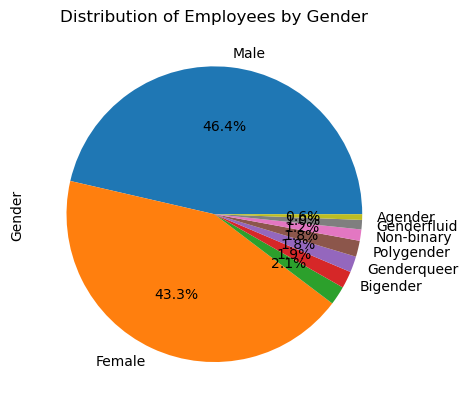

In [38]:
import matplotlib.pyplot as plt
gender_distribution = dataframes['df_employee']['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Employees by Gender')
plt.show()

**2. scatter plot to visualize the relationship between the number of years of experience and the base salary for employees**

In [43]:
dataframes['df_Salary']

,ID_emp,Base_salary
0,00-0264691,84323.46
1,00-1373955,86030.38
2,00-1810227,81880.52
3,00-1818952,81362.57
4,00-3155074,94734.92
...,...,...
995,99-9177149,83021.53
996,99-9335857,81590.95
997,99-9396819,91944.31
998,99-9509695,90373.53


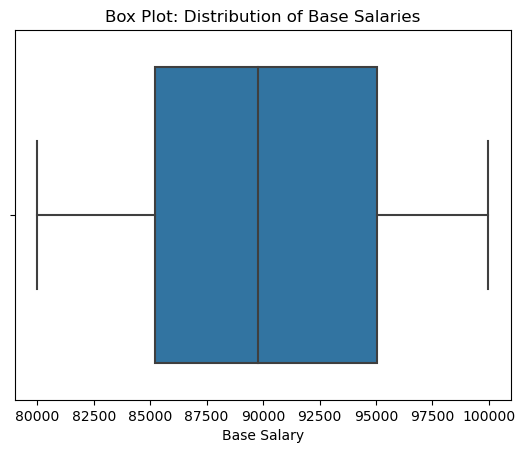

In [47]:
import seaborn as sns
dataframes['df_Salary']['Base_salary'] = dataframes['df_Salary']['Base_salary'].astype(int)
sns.boxplot(x=dataframes['df_Salary']['Base_salary'])
plt.xlabel('Base Salary')
plt.title('Box Plot: Distribution of Base Salaries')
plt.show()